### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [18]:
import numpy as np
m = np.arange(12).reshape((3,4))
print("The number of row: ",m.shape[0])#row
print("The number of column:", m.shape[1])#column
print("The overall mean: ", m.mean()) #overall mean


The number of row:  3
The number of column: 4
The overall mean:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [39]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print("way number 1")
print(np.outer(u,v))

print("way number 2")
m=np.zeros((len(u), len(v)))
for i in range(len(u)) : 
    for j in range(len(v)): 
        m[i,j] = u[i] * v[j] 
print(m)

print("way number 3")
u=u.reshape(len(u), 1)
print(u*v)


way number 1
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
way number 2
[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
way number 3
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [64]:
m = np.random.random((10,6))
print(m)
print()
m[(m<0.1).any(axis=1), :] = 0
print(m)


[[0.836472   0.57277208 0.09999951 0.80718668 0.93085309 0.03201573]
 [0.01019495 0.34600743 0.26409099 0.11859695 0.16306355 0.52864549]
 [0.00859998 0.95970382 0.77740565 0.30605679 0.8810844  0.86501847]
 [0.84337216 0.67451239 0.16016511 0.93284533 0.50143535 0.18975075]
 [0.41753435 0.12839038 0.40216291 0.90183371 0.02742174 0.43459902]
 [0.47700935 0.73492055 0.27067162 0.03589988 0.08779079 0.04979883]
 [0.67089543 0.72816039 0.9871048  0.40205364 0.2974069  0.66803151]
 [0.00766222 0.80066961 0.22857057 0.71270998 0.089869   0.15715601]
 [0.37575766 0.40452303 0.79233169 0.76155318 0.11414802 0.39687915]
 [0.24515235 0.48217575 0.82018131 0.22218532 0.05340309 0.92281116]]

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.84337216 0.67451239 0.16016511 0.93284533 0.50143535 0.18975075]
 [0.         0.         0.      

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

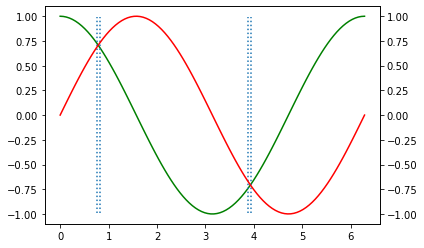

In [101]:
import matplotlib.pyplot as plt 

%matplotlib inline 

xs=np.linspace(0,2*np.pi,100) #2 pi is incluse

extract=xs[::10]  #extraction

reverse_xs = xs[::-1]  #reverse the array

#extract the elements where the absolute difference btw sin-cos<0.1
diff = xs[abs(np.sin(xs)- np.cos(xs)) <0.1]  

#plot
fig=plt.figure()
p1=fig.add_subplot(111)
cos=p1.plot(xs, np.cos(xs),'g',label="cos(x)") #cos is green
p2=p1.twinx()
sin=p2.plot(xs, np.sin(xs),'r',label="sin(x)") #sin is red

#dotted line to show where they are close
plt.vlines(x=diff,linestyles='dotted', ymin= -0.99, ymax=0.99)
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [135]:
a = np.fromfunction(lambda i, j:1+i+(j*(i+1)), (10,10))
print(a)
#trace
print("The trace is: ",np.trace(a))
#extract antidiagonal:
l =[i for i in range(10)]
l2=np.array(l[::-1])
antidiag= a[l,l2]
print("the antidiag is:",antidiag)

#extractdiagonal offset by 1 upwards
l3=np.delete(l,0)
l4=np.delete(l,9)

extract = a[l3,l4]
print( "the diagonal offset by one is: ", extract)


[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
The trace is:  385.0
the antidiag is: [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
the diagonal offset by one is:  [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [333]:
miglia= np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

miglia_to_km =1.60934 

#build grid
griglia=miglia[None,:]-miglia[:,None]

#convert
km_griglia= griglia*miglia_to_km

#print(km_griglia)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

not optimized method:  [ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
eratostene's method [ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]


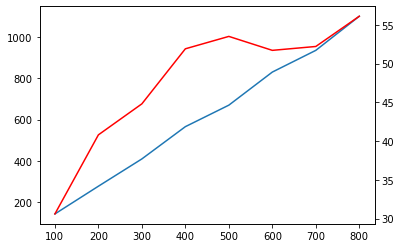

In [277]:
import matplotlib.pyplot as plt 
def f():
    N=100 # max number
    mask=np.ones((N+1,), dtype='bool')
    number=np.array(np.arange(N+1), dtype='int')
    for i in number:
        if i == 0 or i == 1 : pass
        else: 
            mask[i+i::i]=False
            
    return number[mask]

def eratostene():
    n=100
    e_mask=np.ones((n-1,), dtype='bool')#indexed from 2 to n
    for l in range(2,int(np.sqrt(n))):
        if(e_mask[l] == True):
            e_mask[l**2::l] = False
    l=np.arange(0,n-1,1)  
    return l[e_mask]


print("not optimized method: ", f() )
print("eratostene's method", eratostene())


#%timeit -n 200 f()   
performance_f=[144,278,410,566,670,830,935,1100]#for N multiple of 100

#%timeit -n 400 eratostene() 
performance_e=[30.6,40.8,44.8,51.9,53.5,51.7,52.2 ,56.1 ]
xaxis=[(i+1)*100 for i in range(8)]

#The eratostene' s method(red) is substantially faster
fig=plt.figure()
p1=fig.add_subplot(111)
fplot=p1.plot(xaxis,performance_f); #it look like a linear behavior
p2=p1.twinx()
eplot=p2.plot(xaxis,performance_e,'r') #
plt.show()

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

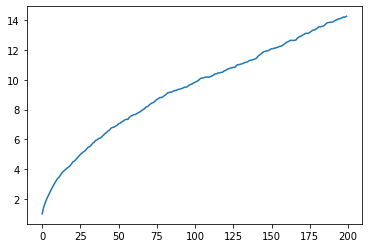

In [306]:
import matplotlib.pyplot as plt 
import numpy as np
import numpy.random as npr
npr.seed(2955520) #fix the seed
grid= npr.randint(0,2, (1000,200)) #create a matrix with 0 and 1 randomly
grid[grid==0]=-1 #substitute 0 with -1
#print(grid)
distance=grid.cumsum(axis=1) #cumulative sum on the rows
squared=distance*distance #square
mean=np.mean(squared,axis=0)

plt.plot(np.arange(200),mean**0.5);
# as It's what I expected because the random walk is a diffusive motion
#mean go like sqrt(time)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [308]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    

--2020-10-28 12:14:38--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2020-10-28 12:14:39--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uceb51bfadea0f2229772752a85b.dl.dropboxusercontent.com/cd/0/inline/BCHCOjr9kGM5kPyO9ODlCr-lLgQd55fOgTMKLaVCPdVkOcqb5OhGKdmZz-1hQ5xpd9nAy3qQVNPwHu8g5455eWDRJiO1bM-aXDCR31Q-Lmrk9w/file# [segue]
--2020-10-28 12:14:39--  https://uceb51bfadea0f2229772752a85b.dl.dropboxusercontent.com/cd/0/inline/BCHCOjr9kGM5kPyO9ODlCr-lLgQd55fOgTMKLaVCPdVkOcqb5OhGKdmZz-1hQ5xpd9nAy3qQVNPwHu8g5455eWDRJiO1bM-aX

the populations stat:
Hares: mean=34081,std = 20898
lynxes: mean=20167,std = 16255
carrots: mean=42400,std = 3323

correlations:
Carrots-Hares' s correlation matrix 
[[ 1.         -0.01660378]
 [-0.01660378  1.        ]]
Carrots-Lynxes' s correlation matrix 
[[ 1.         -0.68057717]
 [-0.68057717  1.        ]]
Lynxes-Hares' s correlation matrix 
[[1.         0.07189206]
 [0.07189206 1.        ]]


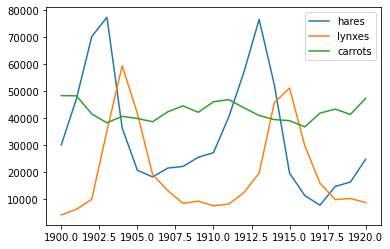

In [332]:
import matplotlib.pyplot as plt 
import numpy as np

data=np.loadtxt('populations.txt')
#charge the array
years=data[:,0]
hares=data[:,1]
lynxes=data[:,2]
carrots=data[:,3]

#plot
plt.plot(years,hares,label='hares')
plt.plot(years,lynxes,label='lynxes')
plt.plot(years,carrots,label='carrots')
plt.legend();

#print the stat
print("the populations stat:")
print("Hares: mean={:.0f},std = {:.0f}".format(np.mean(hares), np.std(hares)))
print("lynxes: mean={:.0f},std = {:.0f}".format(np.mean(lynxes), np.std(lynxes)))
print("carrots: mean={:.0f},std = {:.0f}".format(np.mean(carrots), np.std(carrots)))

print("\ncorrelations:")
print("Carrots-Hares' s correlation matrix \n{}" .format( np.corrcoef(carrots,hares)))
print("Carrots-Lynxes' s correlation matrix \n{}" .format( np.corrcoef(carrots,lynxes)))
print("Lynxes-Hares' s correlation matrix \n{}" .format( np.corrcoef(lynxes,hares)))

#carrots has an higher mean, in the graph we can see which species has an 
#higher populatio for each year, when the hares decrease the lynxes follow with a delay of some year
#does lynxes eat hares? :)  

